## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

[solution](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

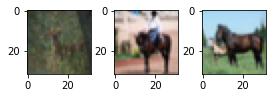

In [4]:
for x in range(10,13):
    plt.subplot(330 + 1 + x)
    plt.imshow(train_images[x])
plt.show()

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [35]:
# image augmentation, could pass rescale here rescale=1./255
datagen_train = ImageDataGenerator(zoom_range=0.2,
                            rotation_range=20,
                            horizontal_flip=True,
                            validation_split=0.2,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            )

# datagen_test = ImageDataGenerator(rescale = 1./255)

In [36]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [37]:
# # passing data augmentation
datagen_train.fit(train_images)
# # datagen_test.fit(test_images)

In [8]:
# train_images = datagen_train.flow(train_images, train_labels, batch_size=32)
# test_images = datagen_test.flow(test_images, test_labels, batch_size=32)

In [8]:
train_images = train_images/255
test_images = test_images/255

In [9]:
# convert to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [10]:
# 10 classes 
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [23]:
train_images.shape
test_images.shape

(10000, 32, 32, 3)

In [26]:
# build network - convolution, pool, flatten, full 
model = Sequential()

# convolution model
model.add(Convolution2D(32, 3, 3, input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #classes 

# compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
test_images.shape

(10000, 32, 32, 3)

In [28]:
history = model.fit(train_images, train_labels,
                    batch_size=128,
                    epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 1.7120 - accuracy: 0.3897 - val_loss: 1.4913 - val_accuracy: 0.4752
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 1.4333 - accuracy: 0.4929 - val_loss: 1.3727 - val_accuracy: 0.5145
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 1.3413 - accuracy: 0.5288 - val_loss: 1.3186 - val_accuracy: 0.5343
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 1.2803 - accuracy: 0.5495 - val_loss: 1.2715 - val_accuracy: 0.5516
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 1.2346 - accuracy: 0.5652 - val_loss: 1.2470 - val_accuracy: 0.5617


In [38]:
# with augmentation 
history2 = model.fit_generator(datagen_train.flow(train_images, train_labels, batch_size=128),
steps_per_epoch=128, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
  4/128 [..............................] - ETA: 2s - loss: 3.0318 - accuracy: 0.0918

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_35081/80860932.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator(datagen_train.flow(train_images, train_labels, batch_size=128),


128/128 [==============================] - 3s 25ms/step - loss: 2.3430 - accuracy: 0.1050 - val_loss: 1.9861 - val_accuracy: 0.3757
Epoch 2/10
128/128 [==============================] - 3s 24ms/step - loss: 2.3052 - accuracy: 0.1042 - val_loss: 1.9582 - val_accuracy: 0.3843
Epoch 3/10
128/128 [==============================] - 3s 25ms/step - loss: 2.3047 - accuracy: 0.1053 - val_loss: 1.9121 - val_accuracy: 0.3901
Epoch 4/10
128/128 [==============================] - 3s 24ms/step - loss: 2.3028 - accuracy: 0.1083 - val_loss: 1.9353 - val_accuracy: 0.3889
Epoch 5/10
128/128 [==============================] - 3s 25ms/step - loss: 2.3038 - accuracy: 0.1060 - val_loss: 1.9366 - val_accuracy: 0.3919
Epoch 6/10
128/128 [==============================] - 3s 24ms/step - loss: 2.3032 - accuracy: 0.1063 - val_loss: 1.8841 - val_accuracy: 0.3924
Epoch 7/10
128/128 [==============================] - 3s 25ms/step - loss: 2.3027 - accuracy: 0.1080 - val_loss: 1.9103 - val_accuracy: 0.3889
Epoch 8/10

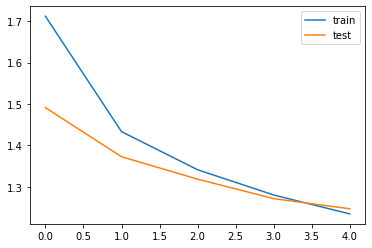

In [33]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

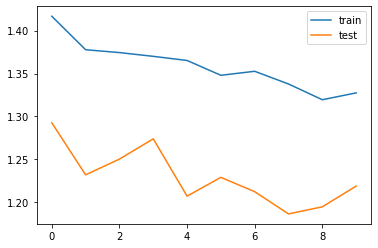

In [31]:
# plot history - with augmentation
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()